# TensorFlow Belgium Traffic Sign Classification : TensorFlow Core
This is a reboot of https://www.datacamp.com/community/tutorials/tensorflow-tutorial for beginners. 
We also extend it to improving the classification accuracy of the model.

This builds upon sudo_tf_datacamp_starter.ipynb, a more elaborate version of the same tutorial above.

In [3]:
# Verify Python kernel is in virtual env
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/home/ubuntu16/anaconda2/envs/tensorflow/bin/python
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 23:32:55) 
[GCC 7.2.0]
sys.version_info(major=2, minor=7, micro=15, releaselevel='final', serial=0)


In [4]:
# Log version details of Python & PyPackages used
%load_ext watermark
%watermark
%watermark -p numpy,skimage,matplotlib,tensorflow 
# random causes character encoding error at ipynb to pdf

2018-06-26T12:00:50

CPython 2.7.15
IPython 5.7.0

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-45-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 1
interpreter: 64bit
numpy 1.14.3
skimage 0.13.1
matplotlib 2.2.2
tensorflow 1.8.0


In [5]:
# Import all modules needed
import os
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import transform
from skimage.color import rgb2gray

In [7]:
# An user defined function to read the dataset
def import_belgiumTrafficSignsData(data_dir_path):
    
    # Our first list
    subdirectories = [d for d in os.listdir(data_dir_path)
                     if os.path.isdir(os.path.join(data_dir_path, d))]
    print("Success!! {0} sub directories found".format(len(subdirectories)))
    print("at  " + str(data_dir_path))
    
    images = []
    labels = []
    
    # Read each .ppm image from each subdirectory
    for d in subdirectories:
        
        subdir_path = os.path.join(data_dir_path, d);
        image_paths = [os.path.join(subdir_path, f) for f in os.listdir(subdir_path)
                      if f.endswith(".ppm")]
        
        for i in image_paths:
            images.append(data.imread(i))
            labels.append(int(d))
        
    print("Success!! Found " + str(len(images)) + " images from " + str(len(set(labels))) + " categories")
    return images, labels # DON"T ADD SPACE or LINE above
    # end of function

In [8]:
# Change the respective paths to YOUR DATA directories
train_data_dir_path = "/home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign/Training"
test_data_dir_path = "/home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign/Testing"
images, labels = import_belgiumTrafficSignsData(train_data_dir_path)
imagesT, labelsT = import_belgiumTrafficSignsData(test_data_dir_path)

Success!! 62 sub directories found
at  /home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign/Training
Success!! Found 4575 images from 62 categories
Success!! 62 sub directories found
at  /home/ubuntu16/Desktop/tensorflow_datacamp/belgium_trafficSign/Testing
Success!! Found 2520 images from 53 categories


In [9]:
# Check the properties
images_array = np.array(images);
labels_array = np.array(labels);

# list properties : LIST
print("\n------images : LIST -------")
print(type(images))
print("images length/samples " + str(len(images)))
print("images 1st sample size " + str(images[0].size))
print("images 1st sample shape " + str(images[0].shape)) # An array of arrays


# numpy array properties : NUMPY ARRAY
print("\n------ images_array : NUMPY ARRAY ------")
print("images_array each item memory " + str(images_array.itemsize) + " bytes")
print("images_array flags: \n" + str(images_array.flags))
print("images_array size " + str(images_array.size))
print("images_array {0} dimensions with shape {1}".format(str(images_array.ndim), str(images_array.shape)))


------images : LIST -------
<type 'list'>
images length/samples 4575
images 1st sample size 7497
images 1st sample shape (51, 49, 3)

------ images_array : NUMPY ARRAY ------
images_array each item memory 8 bytes
images_array flags: 
  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
images_array size 4575
images_array 1 dimensions with shape (4575,)


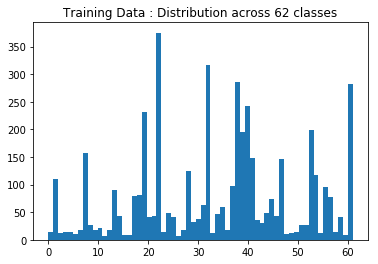

In [10]:
# Histogram plot of training data
plt.hist(labels, len(set(labels))) # Syntax: hist(array, binSize)
plt.title("Training Data : Distribution across 62 classes")
plt.show()

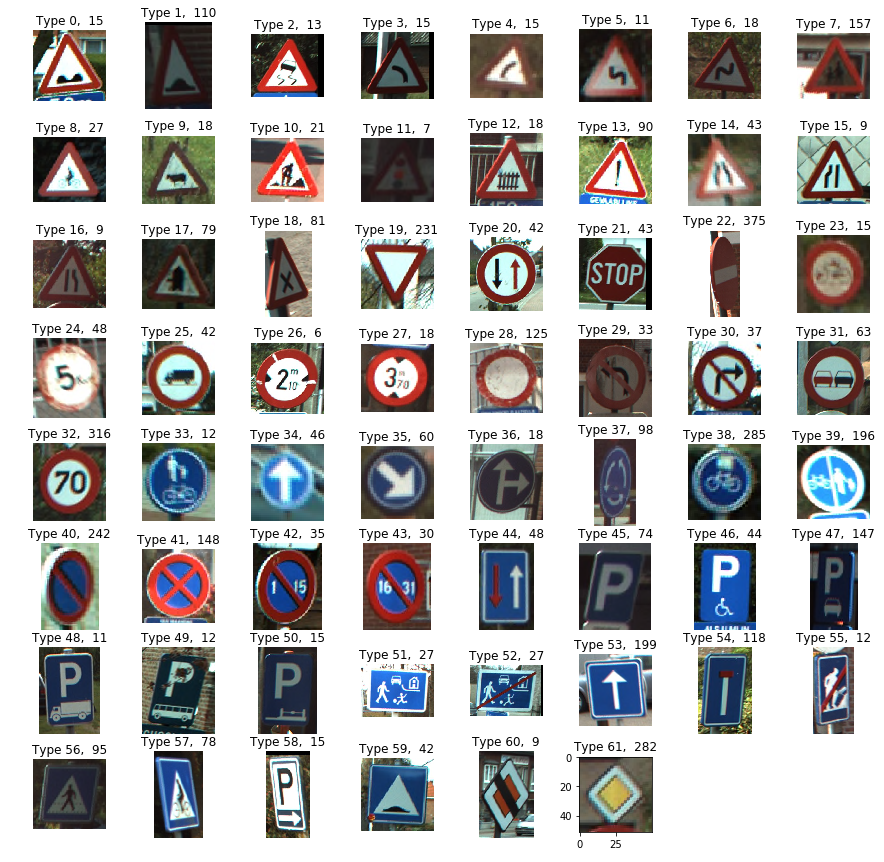

In [11]:
# Visualize the images, and their count
unique_labels = set(labels) # Unique_labels stores the unique entries from labels list

k = 1 # For plotting "k"th image

plt.figure(figsize=(15,15))

for l in unique_labels:
    unique_label_index = labels.index(l) # 1st index of occurance of label "l" in "labels"
    unique_label_count = labels.count(l) # number of times label "l" occurs in "labels"
    
    l_image = images[unique_label_index] # 1st image of the label type

    plt.axis("off")
    plt.subplot(8, 8, k)
    plt.subplots_adjust(wspace = 0.5)
    plt.imshow(l_image)
    plt.title("Type {0},  {1}".format(str(l), unique_label_count))
    k = k + 1
    
plt.show()

## Observations
The histogram and the above output shows that there is class imbalance. The images are of different sizes and need to be resized. They also need to be converted to grayscale.

In [12]:
# Convert to 40x40 size, RGB to gray
images40 = [transform.resize(i, (40,40)) for i in images] # can use images_array or images
images40_array = np.array(images40)

images40Gray = [rgb2gray(i) for i in images40]
images40Gray_array = np.array(images40Gray)

/home/ubuntu16/anaconda2/envs/tensorflow/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [13]:
def viewSampleImages(sampleIndexes, imageData, color):
    k = 1
    for i in sampleIndexes:
        plt.subplot(2, 4, k)
        plt.subplots_adjust(wspace = 0.5)
        plt.imshow(imageData[i], cmap = color)
        plt.title(str(imageData[i].shape)) # Rank 2 tensor, 2D image matrix
        plt.axis("off")
        k = k + 1
        
    plt.show()

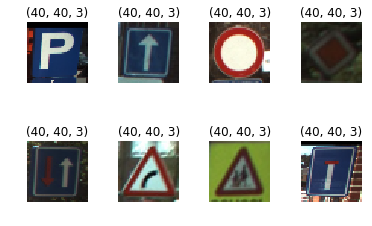

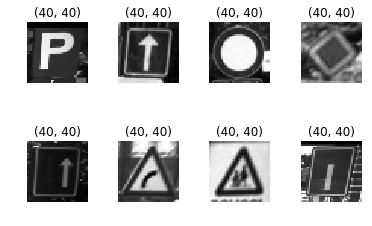

In [14]:
sampleIndexes = random.sample(range(4000), 8)
viewSampleImages(sampleIndexes, images40_array, color = "jet")
viewSampleImages(sampleIndexes, images40Gray_array, color = "gray")

## TensorFlow Neural Network Modeling

We start with designing the model now. We shall proceed first with the grayscale images.

Any neural network architecture can be build from scratch with TensorFlow. However, here many things are already abstracted such as writing your own optimizer like BFGS or GD. The loss functions are also implemented. We can tweak with them to see how the results vary.

In [57]:
def my_tensorflow_model(imageData_array, labels_array):
    s = imageData_array.shape # Samplesx40x40
    samples = s[0]
    r = s[1] # Rows
    c = s[2] # Columns
    
    if imageData_array.ndim > 3 :
        ch = s[3]
        print("RGB image")
    else :
        print("Gray scale image")
    
    print("imageData_array.shape: " + str(imageData_array.shape))
    print("labels_array.shape: " + str(labels_array.shape))
    
    # Step 1: Create placeholders
    x = tf.placeholder(dtype = tf.float32, shape = [None, r, c]) # Data
    y = tf.placeholder(dtype = tf.int32, shape = [None]) # Labels
    
    # Step 2: Flatten the image/x
    x_flatten = tf.contrib.layers.flatten(x)
    
    # Step 3: Create logists/output FC layer
    layer1 = tf.contrib.layers.fully_connected(x_flatten, 62, tf.nn.relu) # Output layer or logits
    print("layer1.shape: " + str(layer1.shape))
    
    # Step 4: Choose a loss function, take mean
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = layer1))
    print("loss.shape: " + str(loss.shape))
    
    # Step 5: Choose the optimizer e.g. SGD, ADAM, RMSProp
    optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss)
    
    correct_pred = tf.argmax(layer1, 1)
    print("correct_pred.shape: " + str(correct_pred.shape))
    
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    print("accuracy.shape: " + str(accuracy.shape))
    
    # Print variables
    print("x_flatten: " + str(x_flatten))
    print("layer1: " + str(layer1))
    print("loss: " + str(loss))
    print("optimizer: " + str(optimizer))
    print("correct_pred: " + str(correct_pred))
    print("accuracy: " + str(accuracy))
    
    tf_var = [x, y, loss, optimizer, correct_pred, accuracy]
    return tf_var
    

## Running the Graph
We just finished defining the compuation graph that we want TensorFlow to execute or run. Now, to do that, we shall define a Session(). KIndly note that the name of the graph here is not there explicitly, since it is a default context manager and hence a default-global-graph type Graph

Remember:

var_as_a_python_value = sess.run(tensorflow_variable)

[_, cross_entropy_py] = sess.run([train_step, cross_entropy],
                                 feed_dict={x: batch_xs, y_: batch_ys})
                                 
to both run the training and pull out the value of the cross entropy as it was computed during the iteration. Note that I turned both the arguments to sess.run and the return values into a list so that both happen.     

In [110]:
tf_var = my_tensorflow_model(images40Gray_array, labels_array)

x = tf_var[0]
y = tf_var[1]
loss = tf_var[2]
optimizer = tf_var[3]

# print tf_var

# Running the tf.Graph
sess = tf.Session()

# Run the computation graph inside sess.run() e.g. sess.run(results)
sess.run(tf.global_variables_initializer())

# Record loss curve
loss_curve = []

for i in range(210):
    _, loss_val = sess.run([optimizer, loss], feed_dict = {x: images40Gray_array, y: labels_array})
    if (i % 10 == 0):
        print("EPOCH: {0}, Loss: {1}".format(i, str(loss_val)))
        loss_curve.append(loss_val)

Gray scale image
imageData_array.shape: (4575, 40, 40)
labels_array.shape: (4575,)
layer1.shape: (?, 62)
loss.shape: ()
correct_pred.shape: (?,)
accuracy.shape: ()
x_flatten: Tensor("Flatten_19/flatten/Reshape:0", shape=(?, 1600), dtype=float32)
layer1: Tensor("fully_connected_19/Relu:0", shape=(?, 62), dtype=float32)
loss: Tensor("Mean_35:0", shape=(), dtype=float32)
optimizer: name: "Adam_17"
op: "NoOp"
input: "^Adam_17/update_fully_connected_19/weights/ApplyAdam"
input: "^Adam_17/update_fully_connected_19/biases/ApplyAdam"
input: "^Adam_17/Assign"
input: "^Adam_17/Assign_1"

correct_pred: Tensor("ArgMax_17:0", shape=(?,), dtype=int64)
accuracy: Tensor("Mean_36:0", shape=(), dtype=float32)
EPOCH: 0, Loss: 4.176113
EPOCH: 10, Loss: 3.3541446
EPOCH: 20, Loss: 2.9294465
EPOCH: 30, Loss: 2.638951
EPOCH: 40, Loss: 2.4454246
EPOCH: 50, Loss: 2.3124588
EPOCH: 60, Loss: 2.2157514
EPOCH: 70, Loss: 2.1412861
EPOCH: 80, Loss: 2.0812547
EPOCH: 90, Loss: 2.030854
EPOCH: 100, Loss: 1.9873339
EPOCH

## Visualize Training & Test Data Predictions

We check the training using the loss function and the change of loss with iterations. This tells if the network is learning anything at all.

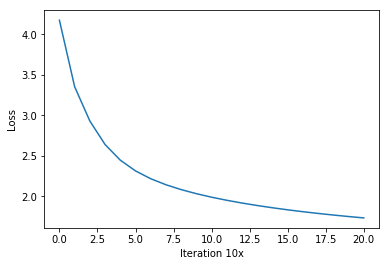

In [115]:
# PLot training error, lower is better
plt.plot(loss_curve)
plt.xlabel("Iteration 10x")
plt.ylabel("Loss")
plt.show()

In [103]:
# Visualize the training error
x = tf_var[0]
correct_pred = tf_var[4]

#####################################################
# Convert predicted to numpy array before checking
train_predicted = sess.run([correct_pred], feed_dict={x: images40Gray_array})
train_predicted = np.array(train_predicted).reshape(len(labels_array))
print labels_array.shape
print train_predicted.shape

match_count = sum([int(y == y_) for y, y_ in zip(labels_array, train_predicted)])
print ("match_count:" + str(match_count))

#####################################################
# Use np.true_divide to avoid zero output
train_accuracy = np.true_divide(match_count, len(labels_array)) * 100
#####################################################

print("Train Accuracy: {:.3f}".format(train_accuracy))

(4575,)
(4575,)
3379
Train Accuracy: 73.858


## Checking Test Data

In [107]:
# Prepare the test data to check the results
# Already the data is in list form in imagesT, labelsT
imagesT40 = [transform.resize(i, (40, 40)) for i in imagesT]
imagesT40_array = np.array(imagesT40) # RGB

imagesT40Gray = [rgb2gray(i) for i in imagesT40]
imagesT40Gray_array = np.array(imagesT40Gray)

labelsT_array = np.array(labelsT)

print("testImages.shape: " + str(imagesT40Gray_array.shape))
print("testLabels.shape: " + str(labelsT_array.shape))

# The neural network is saved in tf.Session() sess and we can run it using sess.run(tensorflow_variable)
x = tf_var[0]
correct_pred = tf_var[4]

test_predicted = sess.run([correct_pred], feed_dict={x: imagesT40Gray_array})
test_predicted = np.array(test_predicted).reshape(len(labelsT_array))
print ("test_predicted.shape: " + str(test_predicted.shape))

match_count = sum([int(y == y_) for y, y_ in zip(labelsT_array, test_predicted)])
print ("match_count:" + str(match_count))

test_accuracy = np.true_divide(match_count, len(labelsT_array)) * 100

print("Test Accuracy: {:.3f}".format(test_accuracy))

testImages.shape: (2520, 40, 40)
testLabels.shape: (2520,)
test_predicted.shape: (2520,)
match_count:1687
Test Accuracy: 66.944


## Over!
We can now go on to improve these results soon.